### Graph and Algorithms

##Problem:
Write a program that finds the number of all walks of length 10, 11, etc. up to 20 in a 20-vertex directed graph. then selects a random vertex, and finds the maximal path by implementing the Trace algorithm.


for solving this we follow these steps:
  
*    Generates and prints the adjacency matrix of a random 20-vertex directed graph.

*   Plots the random graph using networkx and matplotlib.

*   Finds the number of walks of lengths 10, 11, ..., 20 using matrix exponentiation.

*   Selects a random vertex and finds the maximal path starting from that vertex using the Trace Algorithm.

    

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
# Step 1: Generate and print the adjacency matrix
def generate_adjacency_matrix(n):
    """
    Generates a random adjacency matrix for a directed graph with n vertices.
    """
    np.random.seed(42)  # For reproducibility
    A = np.random.randint(0, 2, (n, n))  # Random adjacency matrix (0s and 1s)
    np.fill_diagonal(A, 0)  # Remove self-loops
    return A

# Number of vertices
n = 20
A = generate_adjacency_matrix(n)

# Print the adjacency matrix
print("Adjacency Matrix:")
print(A)


Adjacency Matrix:
[[0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0]
 [1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1]
 [0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0]
 [0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0]
 [1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1]
 [0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0]
 [0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1]
 [1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0]
 [0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1]
 [1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1]
 [0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1]
 [1 0 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1]
 [0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0]
 [1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0]
 [1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0]]


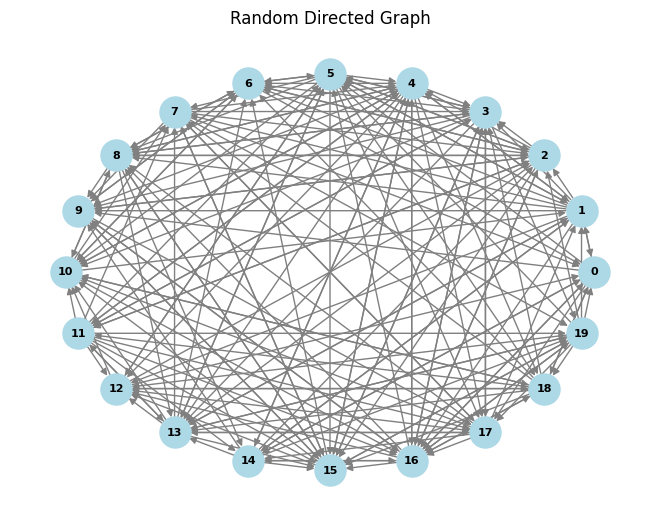

In [3]:
# Step 2: Plot the random graph
def plot_graph(A):
    """
    Plots the directed graph represented by the adjacency matrix A.
    """
    G = nx.DiGraph(A)  # Create a directed graph from the adjacency matrix
    pos = nx.circular_layout(G)  # Layout for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, font_weight='bold', edge_color='gray', arrows=True)
    plt.title("Random Directed Graph")
    plt.show()

# Plot the graph
plot_graph(A)


In [5]:
# Step 3: Find the number of walks of lengths 10, 11, ..., 20
def count_walks_of_length_k(A, k):
    """
    Finds the number of walks of length k in the graph represented by the adjacency matrix A.
    """
    A_k = np.linalg.matrix_power(A, k)  # Compute A^k
    total_walks = np.sum(A_k)  # Sum all entries in A^k
    return total_walks

# Compute the number of walks for lengths 10 to 20
print(f"Number of walks of lengths 10 to {n}:")
for k in range(10, 21):
    total_walks = count_walks_of_length_k(A, k)
    print(f"Length {k}: {total_walks} walks")


Number of walks of lengths 10 to 20:
Length 10: 105207021395 walks
Length 11: 984612539937 walks
Length 12: 9214801911871 walks
Length 13: 86239582246486 walks
Length 14: 807099883103442 walks
Length 15: 7553494629870588 walks
Length 16: 70691722691383372 walks
Length 17: 661590416357789695 walks
Length 18: 6191699145977778894 walks
Length 19: 2606704987156318312 walks
Length 20: 7358809667111550647 walks


In [6]:
# Step 4: Implement the Trace Algorithm to find a maximal path
def trace_algorithm(A, start_vertex):
    """
    Finds a maximal path starting from the given start_vertex using the Trace Algorithm.
    """
    n = A.shape[0]  # Number of vertices
    used_edges = np.zeros_like(A)  # Track used edges
    path = []  # Store the path as a list of edges
    current_vertex = start_vertex

    while True:
        # Find the next unused edge from the current vertex
        next_edge = None
        for neighbor in range(n):
            if A[current_vertex, neighbor] == 1 and used_edges[current_vertex, neighbor] == 0:
                next_edge = (current_vertex, neighbor)
                break

        # If no unused edge is found, terminate
        if next_edge is None:
            break

        # Mark the edge as used
        used_edges[next_edge[0], next_edge[1]] = 1
        path.append(next_edge)  # Add the edge to the path

        # Move to the next vertex
        current_vertex = next_edge[1]

    return path

# Select a random start vertex
start_vertex = np.random.randint(0, n)
print(f"\nSelected start vertex: {start_vertex}")

# Find the maximal path using the Trace Algorithm
maximal_path = trace_algorithm(A, start_vertex)

# Print the maximal path
print("Maximal Path:")
for edge in maximal_path:
    print(f"{edge[0]} -> {edge[1]}")


Selected start vertex: 19
Maximal Path:
19 -> 0
0 -> 1
1 -> 0
0 -> 5
5 -> 1
1 -> 2
2 -> 3
3 -> 5
5 -> 2
2 -> 4
4 -> 1
1 -> 3
3 -> 6
6 -> 0
0 -> 9
9 -> 2
2 -> 5
5 -> 3
3 -> 8
8 -> 2
2 -> 6
6 -> 2
2 -> 8
8 -> 3
3 -> 9
9 -> 6
6 -> 5
5 -> 4
4 -> 3
3 -> 10
10 -> 1
1 -> 4
4 -> 6
6 -> 8
8 -> 4
4 -> 8
8 -> 6
6 -> 9
9 -> 15
15 -> 3
3 -> 11
11 -> 2
2 -> 9
9 -> 16
16 -> 0
0 -> 14
14 -> 0
0 -> 16
16 -> 2
2 -> 11
11 -> 3
3 -> 13
13 -> 1
1 -> 5
5 -> 6
6 -> 10
10 -> 4
4 -> 9
9 -> 17
17 -> 1
1 -> 6
